In [9]:
from tqdm.notebook import tqdm
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import statistics
import seaborn as sns

from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [10]:
movie_df = pd.read_csv("(완)[KOBIS] 박스오피스_일별(2003~2022)_장르_수정.csv")

# 개봉일과 기준일 날짜형식으로 바꾸기
movie_df['개봉일'] = pd.to_datetime(movie_df['개봉일'])
movie_df['기준일'] = pd.to_datetime(movie_df['기준일'])

# 개봉일, 기준일 기준 - 연도, 월 컬럼 각각 추가
movie_df['기준연도'] = movie_df['기준일'].apply(lambda x : x.year)
movie_df['기준월'] = movie_df['기준일'].apply(lambda x : x.month)
movie_df['개봉연도'] = movie_df['개봉일'].apply(lambda x : x.year)
movie_df['개봉월'] = movie_df['개봉일'].apply(lambda x : x.month)

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482752 entries, 0 to 482751
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   순위      482752 non-null  int64         
 1   영화명     482752 non-null  object        
 2   개봉일     482752 non-null  datetime64[ns]
 3   등급      476018 non-null  object        
 4   장르      482752 non-null  object        
 5   대표국적    482714 non-null  object        
 6   국적      482714 non-null  object        
 7   제작사     213248 non-null  object        
 8   배급사     465038 non-null  object        
 9   감독      469607 non-null  object        
 10  배우      447025 non-null  object        
 11  기준일     482752 non-null  datetime64[ns]
 12  매출액     482752 non-null  int64         
 13  누적매출액   482752 non-null  int64         
 14  관객수     482752 non-null  int64         
 15  누적관객수   482752 non-null  int64         
 16  스크린수    482752 non-null  int64         
 17  상영횟수    482752 non-null  int6

# 연도별 매출액, 관객, 스크린수, 상영횟수 분석

In [4]:
movie_info = movie_df[['영화명','개봉일','대표국적','등급','기준일','매출액','누적매출액','관객수','누적관객수','스크린수','상영횟수','기준연도','기준월','개봉연도','개봉월']]
movie_info.head()

,영화명,개봉일,대표국적,등급,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,기준연도,기준월,개봉연도,개봉월
0,동갑내기 과외하기,2003-02-07,한국,12세관람가,2003-01-12,633500,633500,102,102,1,1,2003,1,2003,2
1,매트릭스3 레볼루션,2003-11-05,미국,15세관람가,2003-11-11,7676000,7676000,870,870,6,16,2003,11,2003,11
2,위대한 유산,2003-10-24,한국,15세관람가,2003-11-11,1658000,1658000,177,177,1,3,2003,11,2003,10
3,황산벌,2003-10-17,한국,15세관람가,2003-11-11,1257000,1257000,116,116,1,3,2003,11,2003,10
4,아이덴티티,2003-10-31,미국,15세관람가,2003-11-11,821000,821000,102,102,1,4,2003,11,2003,10


In [5]:
movie_year_info = movie_info.groupby(['기준연도']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
movie_year_info

,매출액,관객수,스크린수,상영횟수
기준연도,,,,
2003,8929674500,1387201,2482,13792
2004,439910258906,69114163,211682,1153629
2005,778210156467,123004102,477303,2478397
2006,891315288300,144063421,599392,2943349
2007,961366753038,151279529,810025,3836733
2008,961029569651,147355367,925985,4153853
2009,1082129159250,155235763,996027,4271023
2010,1156027134350,147580941,1020766,4358578
2011,1233119476000,159399837,1116519,4232988


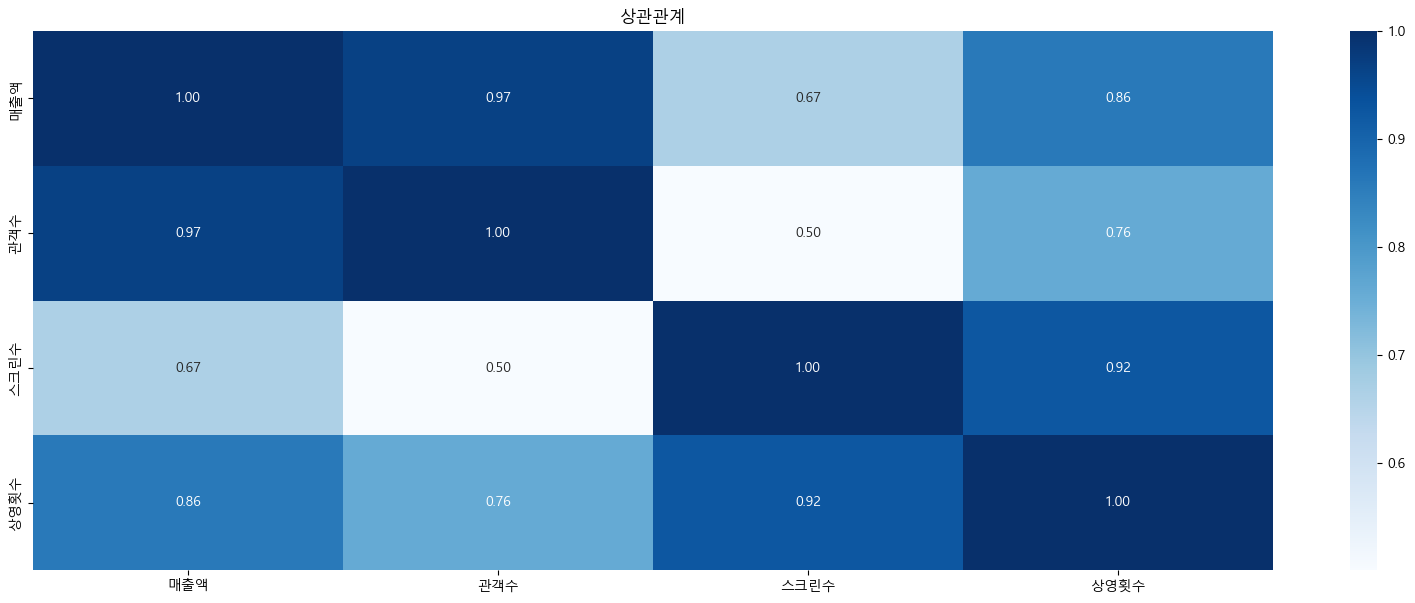

In [5]:
plt.figure(figsize=(20,7))
sns.heatmap(movie_year_info.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("상관관계")
plt.show()

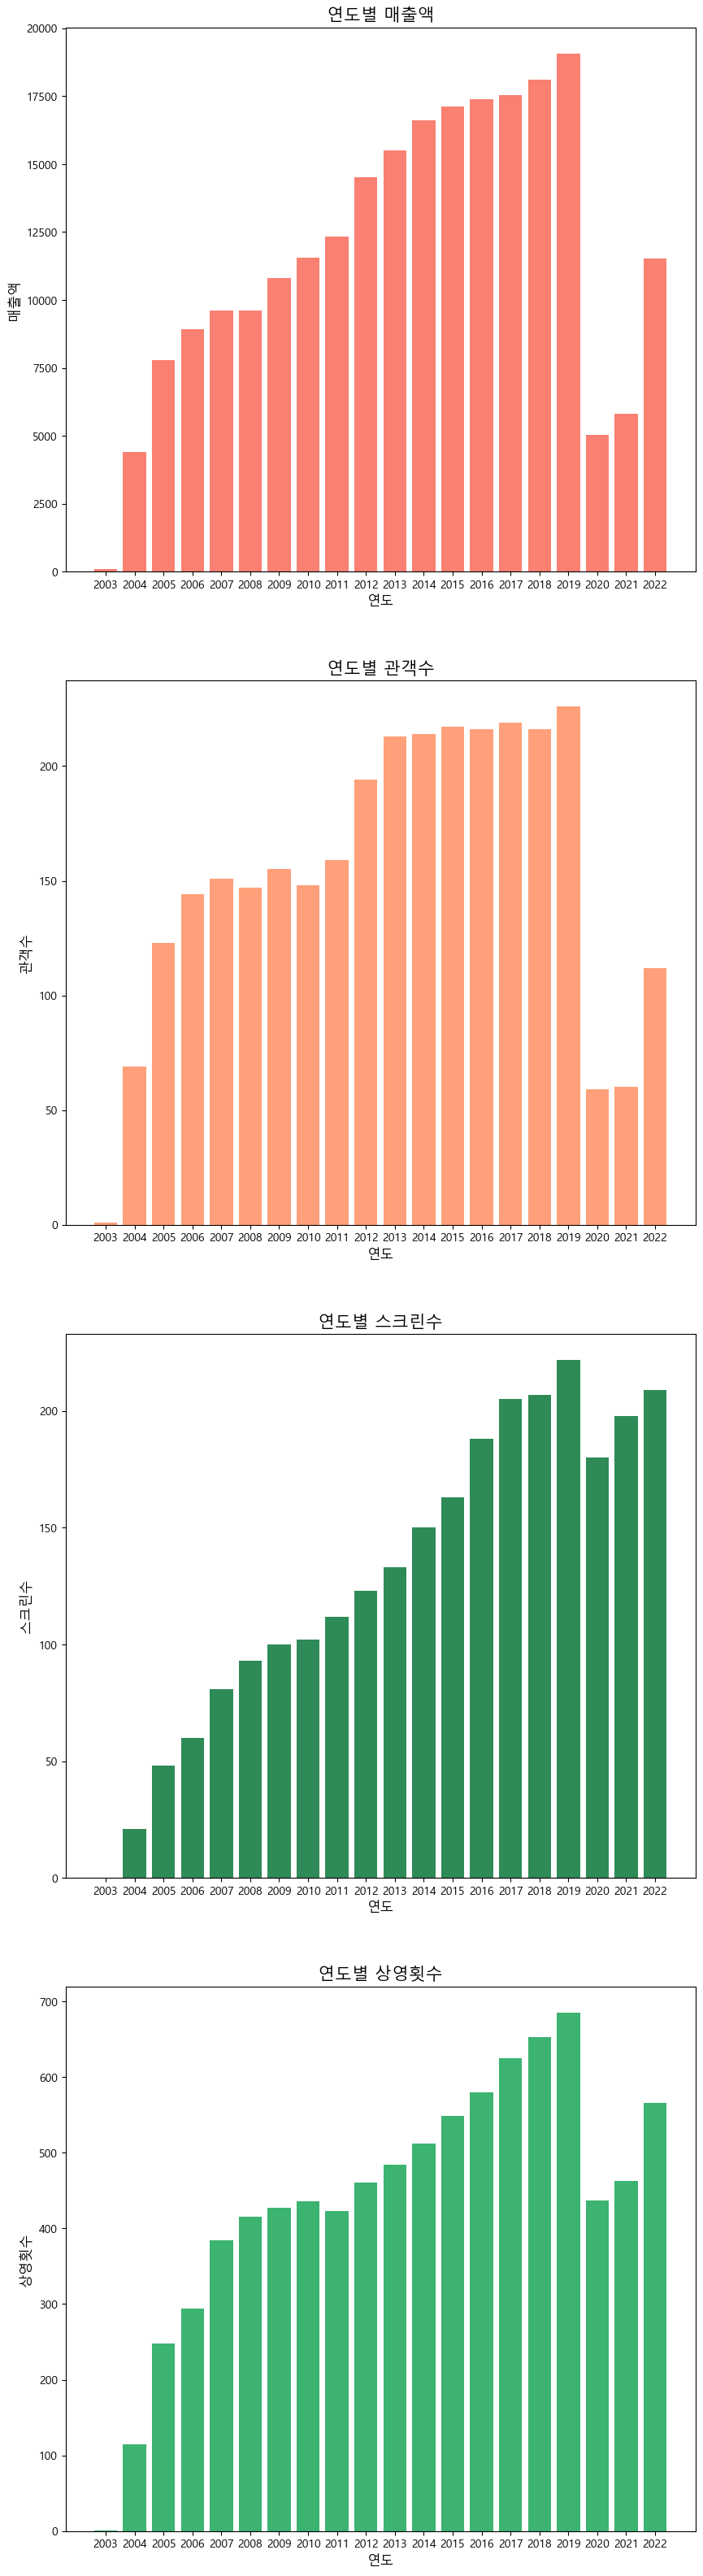

In [22]:
fig = plt.figure(figsize=(10,40))

year_list = list(map(lambda x : str(x),movie_year_info['매출액'].index.to_list()))

ax1 = fig.add_subplot(4,1,1)
ax1.bar(year_list, round(movie_year_info['매출액']/100000000).values, color='salmon')

ax1.set_title('연도별 매출액', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2 = fig.add_subplot(4,1,2)
ax2.bar(year_list, round(movie_year_info['관객수']/1000000).values, color='lightsalmon')

ax2.set_title('연도별 관객수', size=15)
ax2.set_xlabel('연도',size=12)
ax2.set_ylabel('관객수',size=12)

ax3 = fig.add_subplot(4,1,3)
ax3.bar(year_list, round(movie_year_info['스크린수']/10000).values, color='seagreen')

ax3.set_title('연도별 스크린수', size=15)
ax3.set_xlabel('연도',size=12)
ax3.set_ylabel('스크린수',size=12)

ax4 = fig.add_subplot(4,1,4)
ax4.bar(year_list, round(movie_year_info['상영횟수']/10000).values, color='mediumseagreen')

ax4.set_title('연도별 상영횟수', size=15)
ax4.set_xlabel('연도',size=12)
ax4.set_ylabel('상영횟수',size=12)

plt.show()

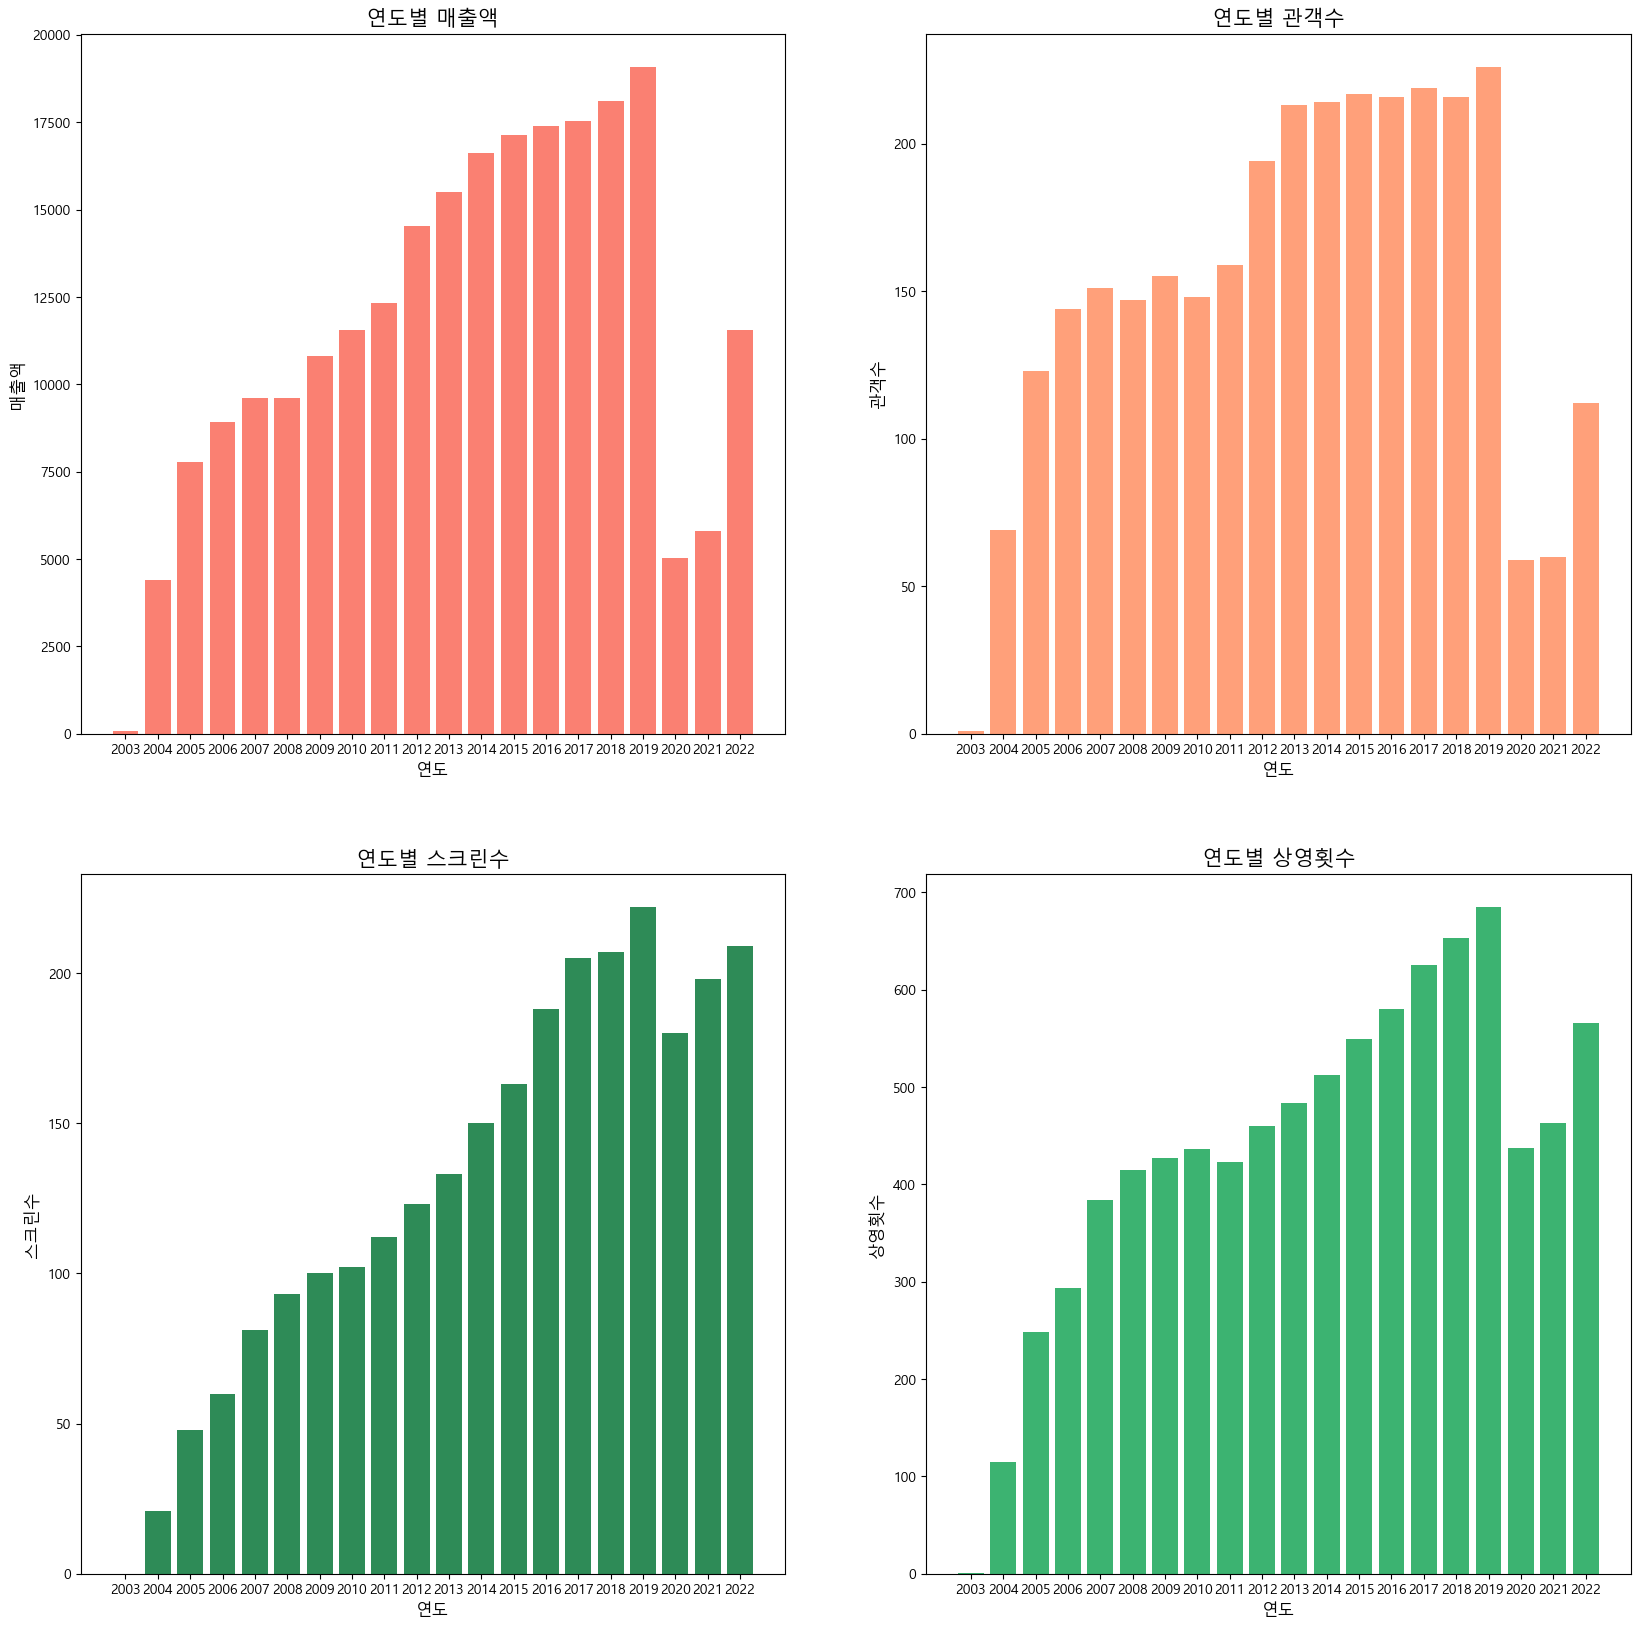

In [8]:
fig = plt.figure(figsize=(20,20))

year_list = list(map(lambda x : str(x),movie_year_info['매출액'].index.to_list()))

ax1 = fig.add_subplot(2,2,1)
ax1.bar(year_list, round(movie_year_info['매출액']/100000000).values, color='salmon')

ax1.set_title('연도별 매출액', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2 = fig.add_subplot(2,2,2)
ax2.bar(year_list, round(movie_year_info['관객수']/1000000).values, color='lightsalmon')

ax2.set_title('연도별 관객수', size=15)
ax2.set_xlabel('연도',size=12)
ax2.set_ylabel('관객수',size=12)

ax3 = fig.add_subplot(2,2,3)
ax3.bar(year_list, round(movie_year_info['스크린수']/10000).values, color='seagreen')

ax3.set_title('연도별 스크린수', size=15)
ax3.set_xlabel('연도',size=12)
ax3.set_ylabel('스크린수',size=12)

ax4 = fig.add_subplot(2,2,4)
ax4.bar(year_list, round(movie_year_info['상영횟수']/10000).values, color='mediumseagreen')

ax4.set_title('연도별 상영횟수', size=15)
ax4.set_xlabel('연도',size=12)
ax4.set_ylabel('상영횟수',size=12)

plt.show()

# 연도별로 월별 총매출 비교 분석

In [24]:
movie_year_month_info = movie_info.groupby(['기준연도','기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
movie_year_month_info

매출액       관객수    스크린수    상영횟수
기준연도 기준월                                        
2003 1          633500       102       1       1
     11     2471407000    375980     779    4305
     12     6457634000   1011119    1702    9486
2004 1     19429676000   3076067    4902   26227
     2     19534622000   3113047    6134   30947
...                ...       ...     ...     ...
2022 8    152170620450  14936414  197023  565580
     9     99853919058   9765290  172686  494860
     10    60794296390   6137247  200852  492896
     11    63218960533   6346918  173477  448290
     12   157349956960  14134727  192179  485720

[231 rows x 4 columns]

In [25]:
movie_month_info = movie_info.groupby(['기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
movie_month_info

,매출액,관객수,스크린수,상영횟수
기준월,,,,
1,2214848518037,293665588,2256909,7312637
2,1864168383186,247777950,2036882,6843355
3,1292278481343,170174643,2100580,6826646
4,1196389119840,156318059,1980749,6462762
5,1941236969280,249507021,2079095,7019290
6,1897763558407,242706013,2021231,7181066
7,2484745751569,322638257,2175158,7737201
8,3054377797345,400598998,2357422,8269616
9,1780087171860,231076694,2207091,7411203


In [26]:
movie_year_month_info

매출액       관객수    스크린수    상영횟수
기준연도 기준월                                        
2003 1          633500       102       1       1
     11     2471407000    375980     779    4305
     12     6457634000   1011119    1702    9486
2004 1     19429676000   3076067    4902   26227
     2     19534622000   3113047    6134   30947
...                ...       ...     ...     ...
2022 8    152170620450  14936414  197023  565580
     9     99853919058   9765290  172686  494860
     10    60794296390   6137247  200852  492896
     11    63218960533   6346918  173477  448290
     12   157349956960  14134727  192179  485720

[231 rows x 4 columns]

In [27]:
movie_year_month_info.loc[2004]

,매출액,관객수,스크린수,상영횟수
기준월,,,,
1,19429676000,3076067,4902,26227
2,19534622000,3113047,6134,30947
3,11776271500,1845235,6739,36863
4,20789576000,3301296,9977,55263
5,24631763900,3809595,10111,55605
6,42691947500,6654037,19510,106491
7,59632490000,9439409,22820,124907
8,62394220000,9820202,24206,136465
9,48649928500,7589619,24596,136681


In [28]:
import matplotlib.pyplot as plt
import random

# 랜덤한 색상 리스트 생성
def generate_random_colors(num_colors):
    colors = []
    for _ in range(num_colors):
        # RGB 값 랜덤 생성
        r = random.random()
        g = random.random()
        b = random.random()
        color = (r, g, b)
        colors.append(color)
    return colors

# 랜덤한 색상 리스트 생성
num_colors = 19  # 원하는 색상 개수
colors = generate_random_colors(num_colors)

In [44]:
# 색상 맵 선택
cmap = cm.get_cmap('tab20c')
colors = cmap(np.array(range(1,50)))

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10760\1826526935.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


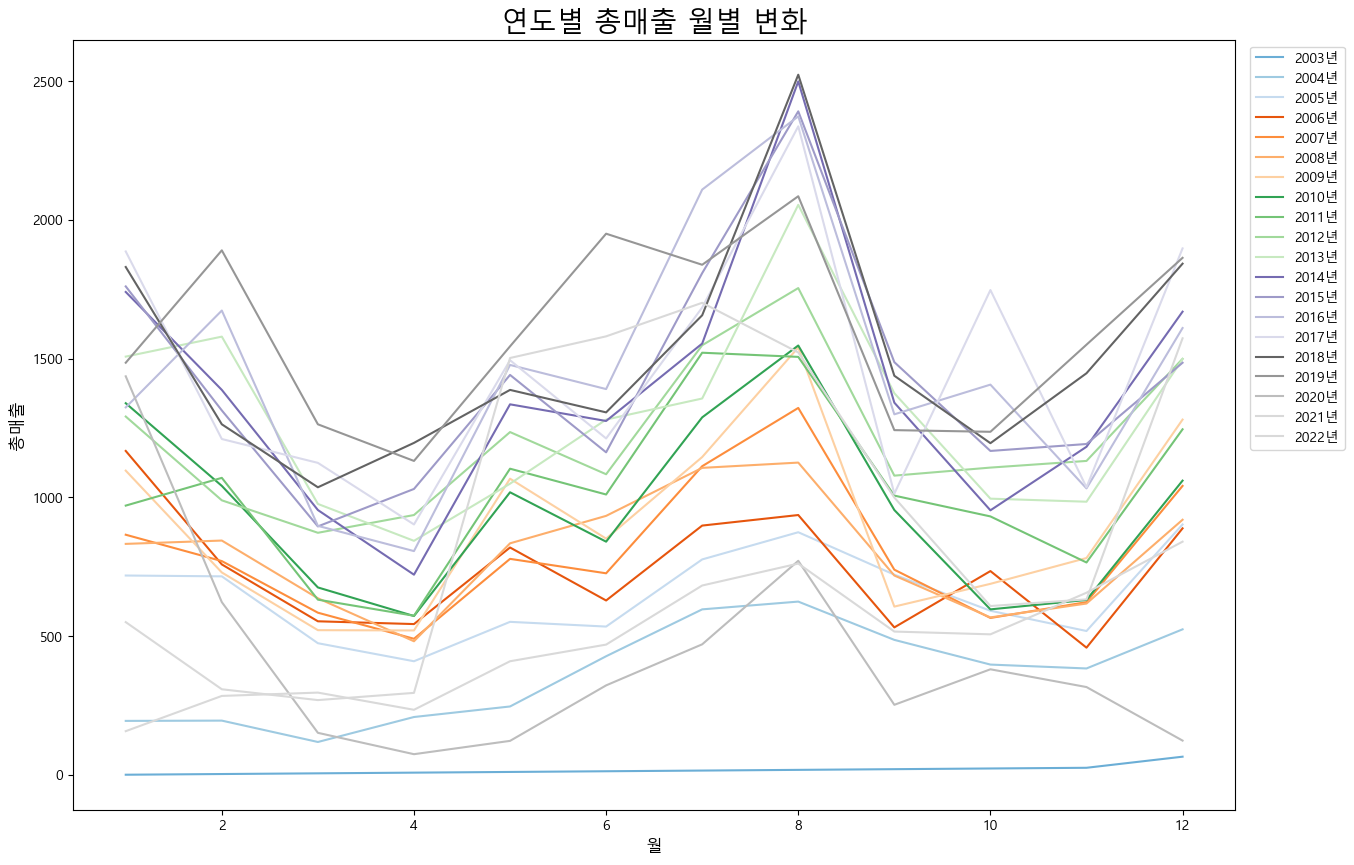

In [34]:
# 연도별 월별 총매출 시각화
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)

year_list = movie_year_month_info.reset_index()['기준연도'].drop_duplicates().reset_index()['기준연도']

for i in range(len(year_list)):
    year = year_list[i]
    ax.plot(movie_year_month_info.loc[year]['매출액'].index,round(movie_year_month_info.loc[year]['매출액']/100000000), color=colors[i], label=f"{year}년")

ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
ax.set_title('연도별 총매출 월별 변화', size=20)
ax.set_xlabel('월',size=12)
ax.set_ylabel('총매출',size=12)
plt.show()

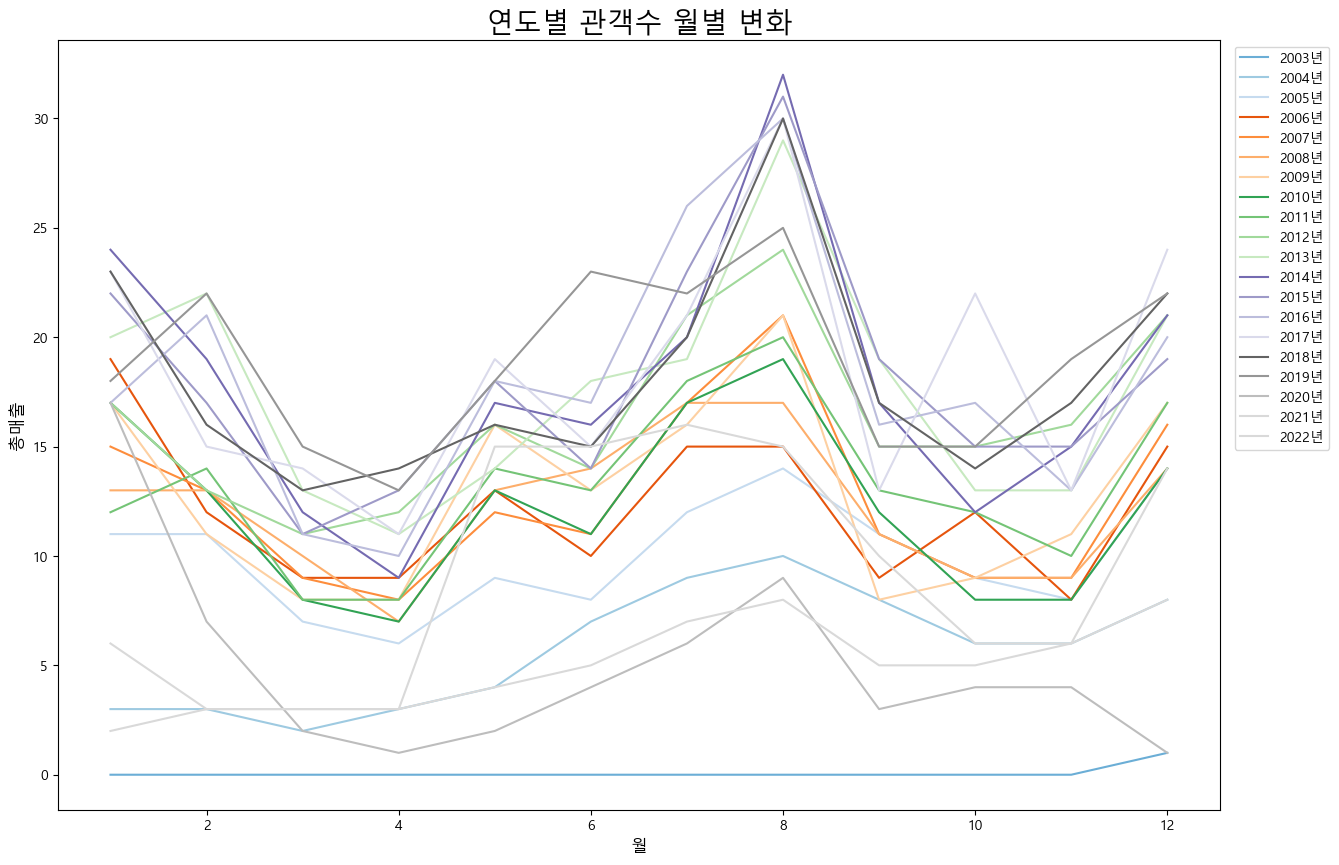

In [35]:
# 연도별 월별 관객수 시각화
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)

year_list = movie_year_month_info.reset_index()['기준연도'].drop_duplicates().reset_index()['기준연도']

for i in range(len(year_list)):
    year = year_list[i]
    ax.plot(movie_year_month_info.loc[year]['관객수'].index,round(movie_year_month_info.loc[year]['관객수']/1000000), color=colors[i], label=f"{year}년")

ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
ax.set_title('연도별 관객수 월별 변화', size=20)
ax.set_xlabel('월',size=12)
ax.set_ylabel('총매출',size=12)
plt.show()

# 관객수가 가장 많은달(8월)과 적은달(4월) 비교

## 월 관객수 100만명이 넘은 영화 장르

In [20]:
month_movie_audience = movie_df.groupby(["영화명","개봉일","기준연도","기준월"])["관객수"].sum().to_frame().reset_index()
month_movie_audience

,영화명,개봉일,기준연도,기준월,관객수
0,#살아있다,2020-06-24,2020,6,1194944
1,#살아있다,2020-06-24,2020,7,702431
2,#살아있다,2020-06-24,2020,8,6328
3,#살아있다,2020-06-24,2020,10,289
4,#아이엠히어,2021-01-14,2021,1,16290
...,...,...,...,...,...
60072,"힘을 내요, 미스터 리",2019-09-11,2019,11,1116
60073,"힘을 내요, 미스터 리",2019-09-11,2019,12,1095
60074,힙스터: 안개의 덫,2015-10-21,2015,10,1
60075,힛쳐,2007-08-01,2007,8,23025


In [21]:
April_audience_movie = month_movie_audience[month_movie_audience["기준월"]==4]
August_audience_movie = month_movie_audience[month_movie_audience["기준월"]==8]
April_audience_movie = April_audience_movie.sort_values(["관객수"],axis=0, ascending=False)
August_audience_movie = August_audience_movie.sort_values(["관객수"],axis=0, ascending=False)

In [22]:
April_audience_movie_top = April_audience_movie[April_audience_movie['관객수']>1000000]
August_audience_movie_top = August_audience_movie[August_audience_movie['관객수']>1000000]

In [23]:
April_audience_movie_top

,영화명,개봉일,기준연도,기준월,관객수
37130,어벤져스: 엔드게임,2019-04-24,2019,4,7331158
37137,어벤져스: 인피니티 워,2018-04-25,2018,4,5260282
37122,어벤져스: 에이지 오브 울트론,2015-04-23,2015,4,4664133
34955,아이언맨 3,2013-04-25,2013,4,3232651
24717,분노의 질주: 더 익스트림,2017-04-12,2017,4,3199324
24706,분노의 질주: 더 세븐,2015-04-01,2015,4,3179607
50518,캡틴 아메리카: 시빌 워,2016-04-27,2016,4,2984718
52343,타이탄,2010-04-01,2010,4,2602125
50528,캡틴 아메리카: 윈터 솔져,2014-03-26,2014,4,2327212
2252,건축학개론,2012-03-22,2012,4,2261329


In [24]:
merge_df = movie_df[["영화명","개봉일","장르"]].drop_duplicates()
merge_df

,영화명,개봉일,장르
0,동갑내기 과외하기,2003-02-07,코미디
1,매트릭스3 레볼루션,2003-11-05,"SF,액션,범죄"
2,위대한 유산,2003-10-24,코미디
3,황산벌,2003-10-17,코미디
4,아이덴티티,2003-10-31,"범죄,스릴러"
...,...,...,...
482498,이스터 선데이,2022-12-28,"코미디,드라마"
482499,프린스 챠밍,2023-01-11,"애니메이션,판타지"
482582,희망의 요소,2022-12-29,멜로/로맨스
482585,겨울 이야기,2023-01-18,드라마


In [25]:
April_top = pd.merge(April_audience_movie_top,merge_df,
                     left_on = ["영화명","개봉일"],right_on = ["영화명","개봉일"], how='left')
August_top = pd.merge(August_audience_movie_top,merge_df,
                     left_on = ["영화명","개봉일"],right_on = ["영화명","개봉일"], how='left')

In [26]:
movie_genre = movie_df[['영화명','개봉일','기준연도','기준월','매출액','관객수','장르']].copy()
movie_genre.dropna(subset=["장르"],inplace=True)

In [27]:
genre = []
for li in movie_genre['장르'].unique():
    if ',' in li:
        pass
    else:
        genre.append(li)
len(genre)

19

In [28]:
# 장르별 컬럼 만들기
for col in genre:
    April_top[col]=0
    August_top[col]=0
    
April_top.head(3)
August_top.head(3)

,영화명,개봉일,기준연도,기준월,관객수,장르,코미디,사극,드라마,스릴러,...,판타지,다큐멘터리,공포(호러),애니메이션,범죄,미스터리,뮤지컬,서부극(웨스턴),기타,가족
0,명량,2014-07-30,2014,8,15539489,"사극,액션",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,신과함께-인과 연,2018-08-01,2018,8,12021793,"판타지,드라마",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,택시운전사,2017-08-02,2017,8,11538253,드라마,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
for col in genre:
    April_top[col]=April_top["장르"].apply(lambda x: 1 if col in x else 0)
    August_top[col]=August_top["장르"].apply(lambda x: 1 if col in x else 0)

In [46]:
April_top.head(2)

,영화명,개봉일,기준연도,기준월,관객수,장르,코미디,사극,드라마,스릴러,...,판타지,다큐멘터리,공포(호러),애니메이션,범죄,미스터리,뮤지컬,서부극(웨스턴),기타,가족
0,어벤져스: 엔드게임,2019-04-24,2019,4,7331158,"액션,SF",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,어벤져스: 인피니티 워,2018-04-25,2018,4,5260282,"액션,어드벤처,판타지,SF",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
April_top

,영화명,개봉일,기준연도,기준월,관객수,장르,코미디,사극,드라마,스릴러,...,판타지,다큐멘터리,공포(호러),애니메이션,범죄,미스터리,뮤지컬,서부극(웨스턴),기타,가족
0,어벤져스: 엔드게임,2019-04-24,2019,4,7331158,"액션,SF",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,어벤져스: 인피니티 워,2018-04-25,2018,4,5260282,"액션,어드벤처,판타지,SF",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,어벤져스: 에이지 오브 울트론,2015-04-23,2015,4,4664133,"액션,어드벤처,판타지,SF",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,아이언맨 3,2013-04-25,2013,4,3232651,"액션,어드벤처,SF",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,분노의 질주: 더 익스트림,2017-04-12,2017,4,3199324,"액션,범죄,스릴러",0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,분노의 질주: 더 세븐,2015-04-01,2015,4,3179607,"액션,범죄,스릴러",0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,캡틴 아메리카: 시빌 워,2016-04-27,2016,4,2984718,"액션,SF,스릴러",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,타이탄,2010-04-01,2010,4,2602125,"액션,어드벤처,판타지",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,캡틴 아메리카: 윈터 솔져,2014-03-26,2014,4,2327212,"액션,어드벤처,SF",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,건축학개론,2012-03-22,2012,4,2261329,"멜로/로맨스,드라마",0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
April_genre_df = April_top.iloc[:,6:]
April_total_genre = April_genre_df.sum(axis=0)
April_total_genre.sort_values(ascending=False, inplace=True)
April_total_genre_df = April_total_genre[:10]
April_total_genre_df['others'] = April_total_genre[10:].sum(axis=0)

August_genre_df = August_top.iloc[:,6:]
August_total_genre = August_genre_df.sum(axis=0)
August_total_genre.sort_values(ascending=False, inplace=True)
August_total_genre_df = August_total_genre[:10]
August_total_genre_df['others'] = August_total_genre[10:].sum(axis=0)

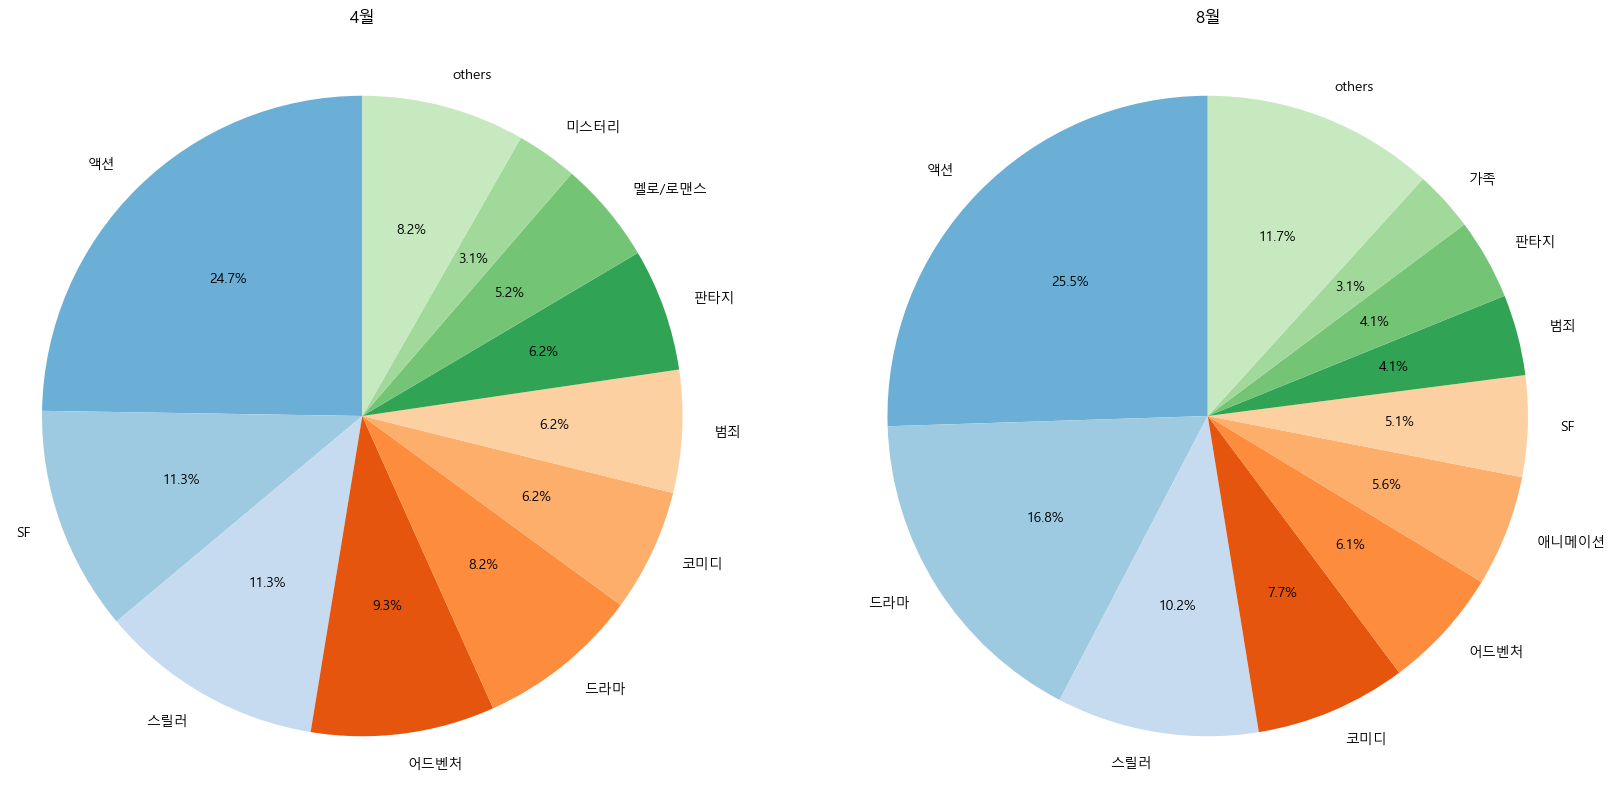

In [49]:
# 관객수 많은 영화 장르 비교
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(April_total_genre_df.values.flatten(), labels=April_total_genre_df.index, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.pie(August_total_genre_df.values.flatten(), labels=August_total_genre_df.index, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax1.set_title('4월')
ax1.axis('equal')
ax2.set_title('8월')
ax2.axis('equal')

plt.show()

## 4월과 8월에 개봉한 영화 장르

In [31]:
open_movie = movie_df[['영화명','개봉일','개봉연도','개봉월','관객수','장르']].copy()
open_movie.drop_duplicates(inplace=True)
open_movie

,영화명,개봉일,개봉연도,개봉월,관객수,장르
0,동갑내기 과외하기,2003-02-07,2003,2,102,코미디
1,매트릭스3 레볼루션,2003-11-05,2003,11,870,"SF,액션,범죄"
2,위대한 유산,2003-10-24,2003,10,177,코미디
3,황산벌,2003-10-17,2003,10,116,코미디
4,아이덴티티,2003-10-31,2003,10,102,"범죄,스릴러"
...,...,...,...,...,...,...
482746,성적표의 김민영,2022-09-08,2022,9,87,드라마
482748,더 메뉴,2022-12-07,2022,12,107,스릴러
482749,양자경의 더 모든 날 모든 순간,2022-11-23,2022,11,276,"액션,코미디"
482750,캐리와 슈퍼콜라,2023-01-18,2023,1,295,애니메이션


In [33]:
open_movie_df = open_movie.groupby(["영화명","개봉일","개봉연도","개봉월"])["관객수"].sum().to_frame().reset_index().set_index('영화명')
open_movie_df

,개봉일,개봉연도,개봉월,관객수
영화명,,,,
#살아있다,2020-06-24,2020,6,1903979
#아이엠히어,2021-01-14,2021,1,16363
#위왓치유,2021-06-03,2021,6,1581
...ing,2003-11-28,2003,11,34308
0.0MHz,2019-05-29,2019,5,137293
...,...,...,...,...
"힘내세요, 병헌씨",2013-06-27,2013,6,3338
"힘을 내요, 미스터 리",2019-09-11,2019,9,1181754
힙스터: 안개의 덫,2015-10-21,2015,10,1


In [34]:
April_open_movie = open_movie_df[open_movie_df["개봉월"]==4]
August_open_movie = open_movie_df[open_movie_df["개봉월"]==8]
April_open_movie = April_open_movie.sort_values(["관객수"],axis=0, ascending=False)
August_open_movie = August_open_movie.sort_values(["관객수"],axis=0, ascending=False)

In [55]:
April_open_movie

,개봉일,개봉연도,개봉월,관객수
영화명,,,,
어벤져스: 엔드게임,2019-04-24,2019,4,13977174
어벤져스: 인피니티 워,2018-04-25,2018,4,11232736
어벤져스: 에이지 오브 울트론,2015-04-23,2015,4,10504408
아이언맨 3,2013-04-25,2013,4,9001608
캡틴 아메리카: 시빌 워,2016-04-27,2016,4,8678260
...,...,...,...,...
꽃잎,1996-04-05,1996,4,0
인터뷰,2000-04-01,2000,4,0
아벤고 공수군단,1982-04-24,1982,4,0


In [35]:
April_open = pd.merge(April_open_movie,merge_df,
                     left_on = ["영화명","개봉일"], right_on = ["영화명","개봉일"], how='left')
August_open = pd.merge(August_open_movie,merge_df,
                     left_on = ["영화명","개봉일"], right_on = ["영화명","개봉일"], how='left')

In [36]:
# 장르별 컬럼 만들기
for col in genre:
    April_open[col]=0
    August_open[col]=0
    
April_open.head(3)
August_open.head(3)

,영화명,개봉일,개봉연도,개봉월,관객수,장르,코미디,사극,드라마,스릴러,...,판타지,다큐멘터리,공포(호러),애니메이션,범죄,미스터리,뮤지컬,서부극(웨스턴),기타,가족
0,베테랑,2015-08-05,2015,8,13413185,"액션,드라마",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,신과함께-인과 연,2018-08-01,2018,8,12277617,"판타지,드라마",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,택시운전사,2017-08-02,2017,8,12189180,드라마,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
for col in genre:
    April_open[col]=April_open["장르"].apply(lambda x: 1 if col in x else 0)
    August_open[col]=August_open["장르"].apply(lambda x: 1 if col in x else 0)

In [60]:
April_open_genre_df = April_open.iloc[:,6:]
April_open_total_genre = April_open_genre_df.sum(axis=0)
April_open_total_genre.sort_values(ascending=False, inplace=True)
April_open_total_genre_df = April_open_total_genre[:10]
April_open_total_genre_df['others'] = April_open_total_genre[10:].sum(axis=0)


August_open_genre_df = August_open.iloc[:,6:]
August_open_total_genre = August_open_genre_df.sum(axis=0)
August_open_total_genre.sort_values(ascending=False, inplace=True)
August_open_total_genre_df = August_open_total_genre[:10]
August_open_total_genre_df['others'] = August_open_total_genre[10:].sum(axis=0)

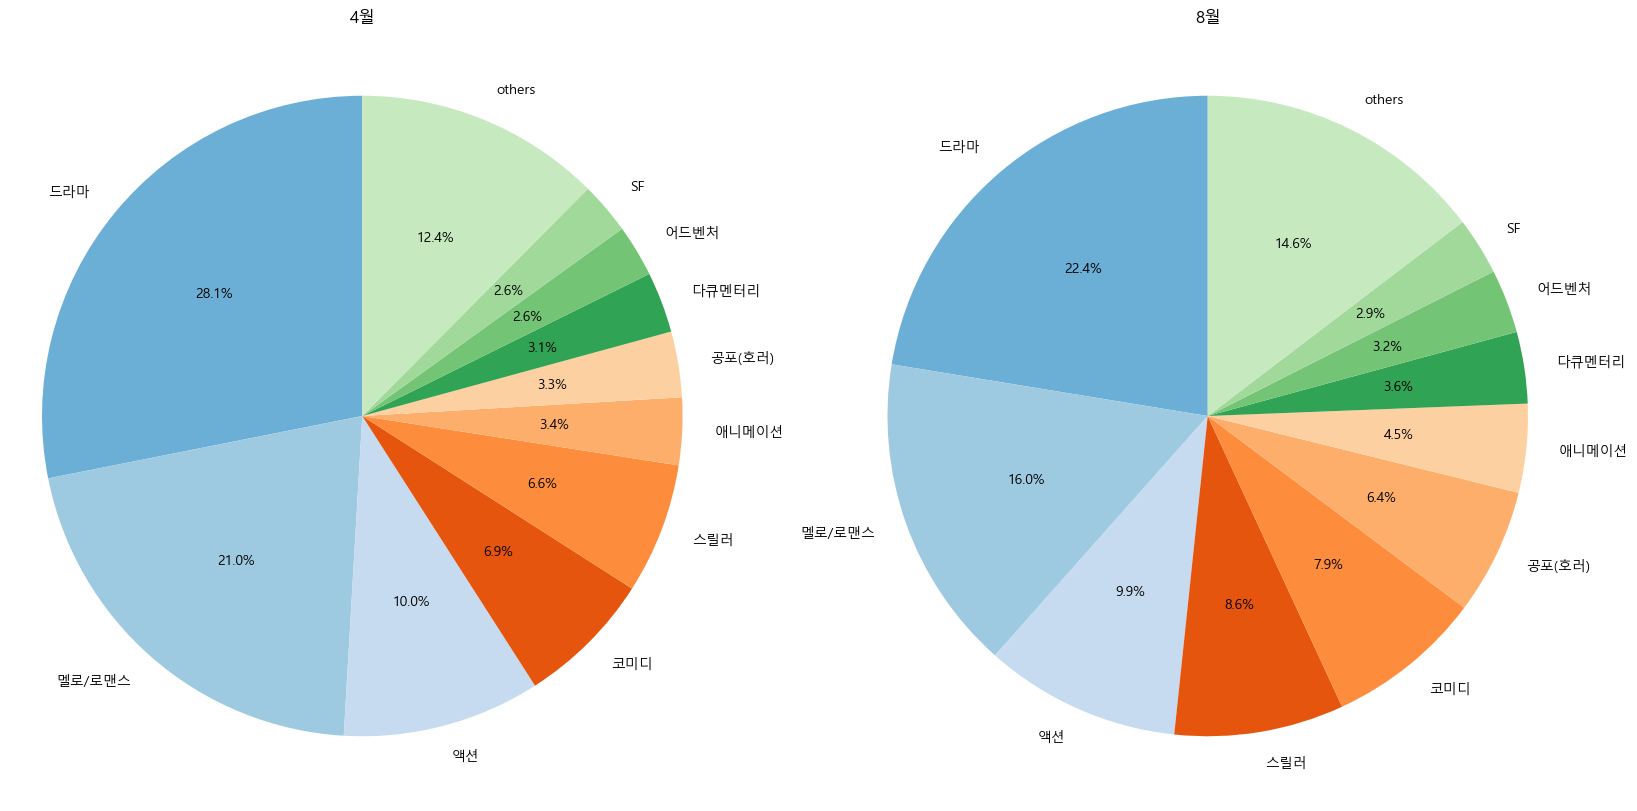

In [61]:
# 개봉한 영화 장르 비교
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(April_open_total_genre_df.values.flatten(), labels=April_open_total_genre_df.index, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.pie(August_open_total_genre_df.values.flatten(), labels=August_open_total_genre_df.index, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax1.set_title('4월')
ax1.axis('equal')
ax2.set_title('8월')
ax2.axis('equal')

plt.show()

# 역대 장르 비교

In [11]:
# 역대 장르
top_movie = pd.read_csv("누적관객수_백만명_이상_766개.csv")

# 개봉일과 기준일 날짜형식으로 바꾸기
top_movie['개봉일'] = pd.to_datetime(top_movie['개봉일'])
top_movie['기준일'] = pd.to_datetime(top_movie['기준일'])

# 개봉일, 기준일 기준 - 연도, 월 컬럼 각각 추가
top_movie['기준연도'] = top_movie['기준일'].apply(lambda x : x.year)
top_movie['기준월'] = top_movie['기준일'].apply(lambda x : x.month)
top_movie['개봉연도'] = top_movie['개봉일'].apply(lambda x : x.year)
top_movie['개봉월'] = top_movie['개봉일'].apply(lambda x : x.month)

top_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65794 entries, 0 to 65793
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      65794 non-null  int64         
 1   영화명     65794 non-null  object        
 2   개봉일     65794 non-null  datetime64[ns]
 3   등급      65794 non-null  object        
 4   장르      65794 non-null  object        
 5   대표국적    65794 non-null  object        
 6   국적      65794 non-null  object        
 7   제작사     42244 non-null  object        
 8   배급사     65739 non-null  object        
 9   감독      65794 non-null  object        
 10  배우      65732 non-null  object        
 11  기준일     65794 non-null  datetime64[ns]
 12  매출액     65794 non-null  int64         
 13  누적매출액   65794 non-null  int64         
 14  관객수     65794 non-null  int64         
 15  누적관객수   65794 non-null  int64         
 16  스크린수    65794 non-null  int64         
 17  상영횟수    65794 non-null  int64         
 18  기준연도  

In [37]:
top_movie_df = top_movie.groupby(['영화명','개봉일'])['누적관객수'].max().sort_values(ascending=False).to_frame()
top_movie_df

,,누적관객수
영화명,개봉일,
명량,2014-07-30,17615919
극한직업,2019-01-23,16266338
신과함께-죄와 벌,2017-12-20,14414658
국제시장,2014-12-17,14264478
어벤져스: 엔드게임,2019-04-24,13977602
...,...,...
밴티지 포인트,2008-02-28,1007729
존 윅 3: 파라벨룸,2019-06-26,1007383
맨 인 더 다크,2016-10-05,1003406


In [15]:
merge_df

,영화명,개봉일,장르
0,동갑내기 과외하기,2003-02-07,코미디
1,매트릭스3 레볼루션,2003-11-05,"SF,액션,범죄"
2,위대한 유산,2003-10-24,코미디
3,황산벌,2003-10-17,코미디
4,아이덴티티,2003-10-31,"범죄,스릴러"
...,...,...,...
482498,이스터 선데이,2022-12-28,"코미디,드라마"
482499,프린스 챠밍,2023-01-11,"애니메이션,판타지"
482582,희망의 요소,2022-12-29,멜로/로맨스
482585,겨울 이야기,2023-01-18,드라마


In [38]:
top_movie_df2 = pd.merge(top_movie_df,merge_df,
                     left_on = ["영화명","개봉일"], right_on = ["영화명","개봉일"], how='left')

In [39]:
merge_df2 = merge_df.copy()

In [40]:
# 장르별 컬럼 만들기
for col in genre:
    top_movie_df2[col]=0
    merge_df2[col]=0
    
top_movie_df2.head(3)

,영화명,개봉일,누적관객수,장르,코미디,사극,드라마,스릴러,액션,어드벤처,...,판타지,다큐멘터리,공포(호러),애니메이션,범죄,미스터리,뮤지컬,서부극(웨스턴),기타,가족
0,명량,2014-07-30,17615919,"사극,액션",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,극한직업,2019-01-23,16266338,코미디,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,신과함께-죄와 벌,2017-12-20,14414658,"판타지,드라마",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
for col in genre:
    top_movie_df2[col]=top_movie_df2["장르"].apply(lambda x: 1 if col in x else 0)
    merge_df2[col]=merge_df2["장르"].apply(lambda x: 1 if col in x else 0)

In [42]:
top_movie_genre_df = top_movie_df2.iloc[:,4:]
top_movie_total_genre = top_movie_genre_df.sum(axis=0)
top_movie_total_genre.sort_values(ascending=False, inplace=True)
top_movie_total_genre_df = top_movie_total_genre[:10]
top_movie_total_genre_df['others'] = top_movie_total_genre[10:].sum(axis=0)

merge_genre_df = merge_df2.iloc[:,3:]
merge_total_genre = merge_genre_df.sum(axis=0)
merge_total_genre.sort_values(ascending=False, inplace=True)
merge_total_genre_df = merge_total_genre[:10]
merge_total_genre_df['others'] = merge_total_genre[10:].sum(axis=0)

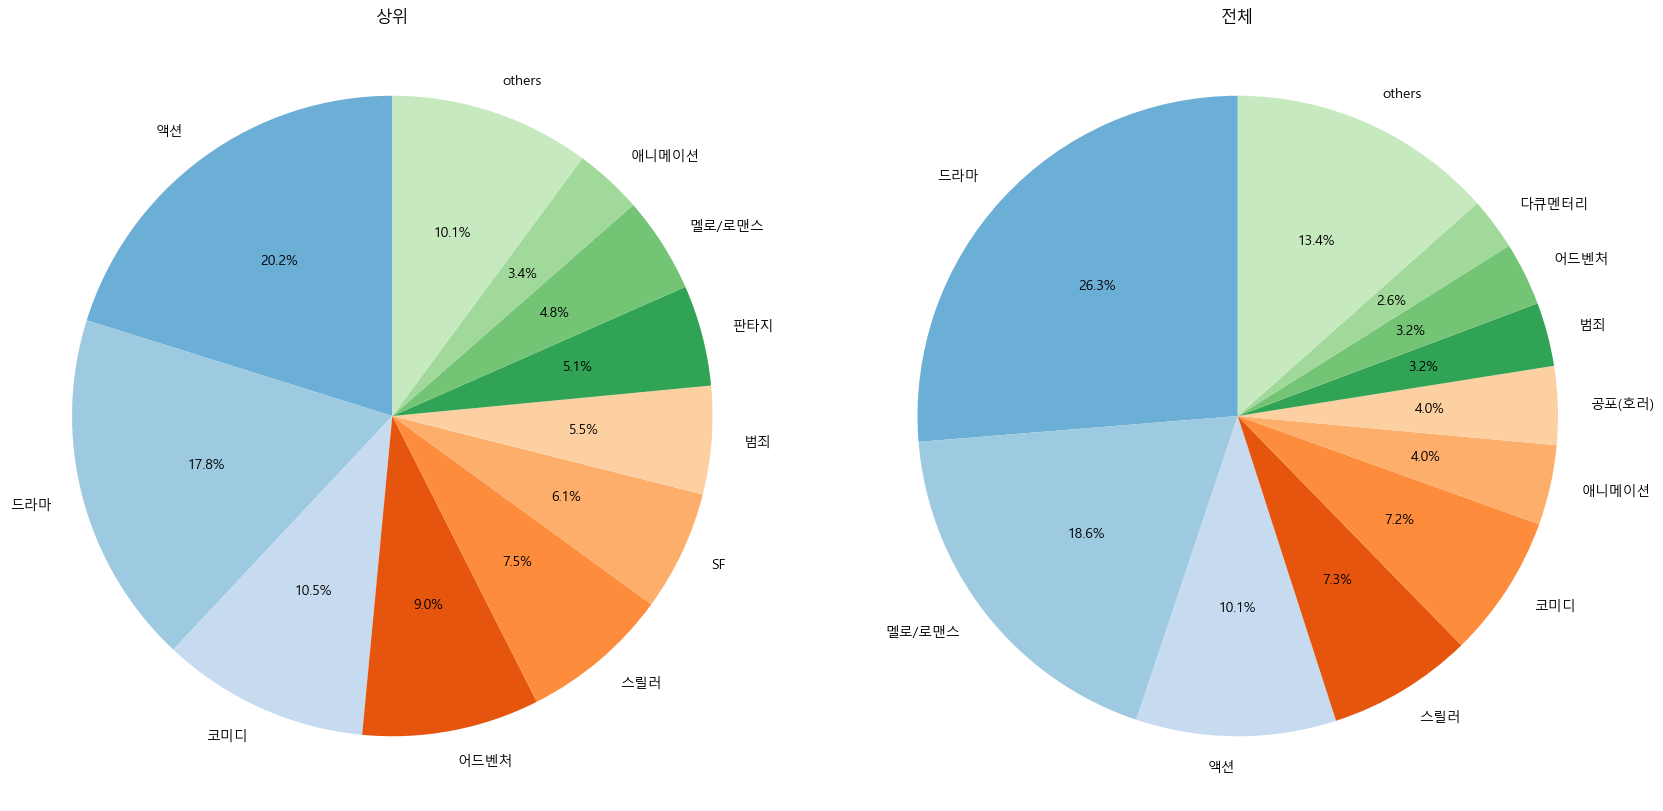

In [45]:
# 개봉한 영화 장르 비교
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(top_movie_total_genre_df.values.flatten(), labels=top_movie_total_genre_df.index, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.pie(merge_total_genre_df.values.flatten(), labels=merge_total_genre_df.index, autopct='%1.1f%%', 
                        startangle=90, colors=colors)

ax1.set_title('상위')
ax1.axis('equal')
ax2.set_title('전체')
ax2.axis('equal')

plt.show()

In [46]:
top_movie_total_genre

액션          329
드라마         291
코미디         171
어드벤처        146
스릴러         123
SF           99
범죄           89
판타지          83
멜로/로맨스       79
애니메이션        56
가족           39
미스터리         35
사극           32
공포(호러)       23
전쟁           21
뮤지컬          10
다큐멘터리         3
서부극(웨스턴)      1
기타            1
dtype: int64

In [72]:
merge_total_genre

드라마         7885
멜로/로맨스      5573
액션          3029
스릴러         2200
코미디         2164
애니메이션       1209
공포(호러)      1189
범죄           964
어드벤처         960
다큐멘터리        792
SF           768
판타지          758
기타           642
미스터리         577
가족           480
전쟁           385
사극           191
뮤지컬          158
서부극(웨스턴)      72
dtype: int64

In [48]:
top_genre_df = pd.merge(top_movie_total_genre.to_frame().reset_index(), 
                        merge_total_genre.to_frame().reset_index(),
                        left_on = 'index', right_on = 'index', how='left')
top_genre_df.columns = ["장르","상위","전체"]
top_genre_df["비율"] = round((top_genre_df["상위"]/top_genre_df["전체"])*100,1)
top_genre_df.sort_values(['비율'],ascending=False)

,장르,상위,전체,비율
12,사극,32,191,16.8
3,어드벤처,146,960,15.2
5,SF,99,768,12.9
0,액션,329,3029,10.9
7,판타지,83,758,10.9
6,범죄,89,964,9.2
10,가족,39,480,8.1
2,코미디,171,2164,7.9
15,뮤지컬,10,158,6.3
11,미스터리,35,577,6.1


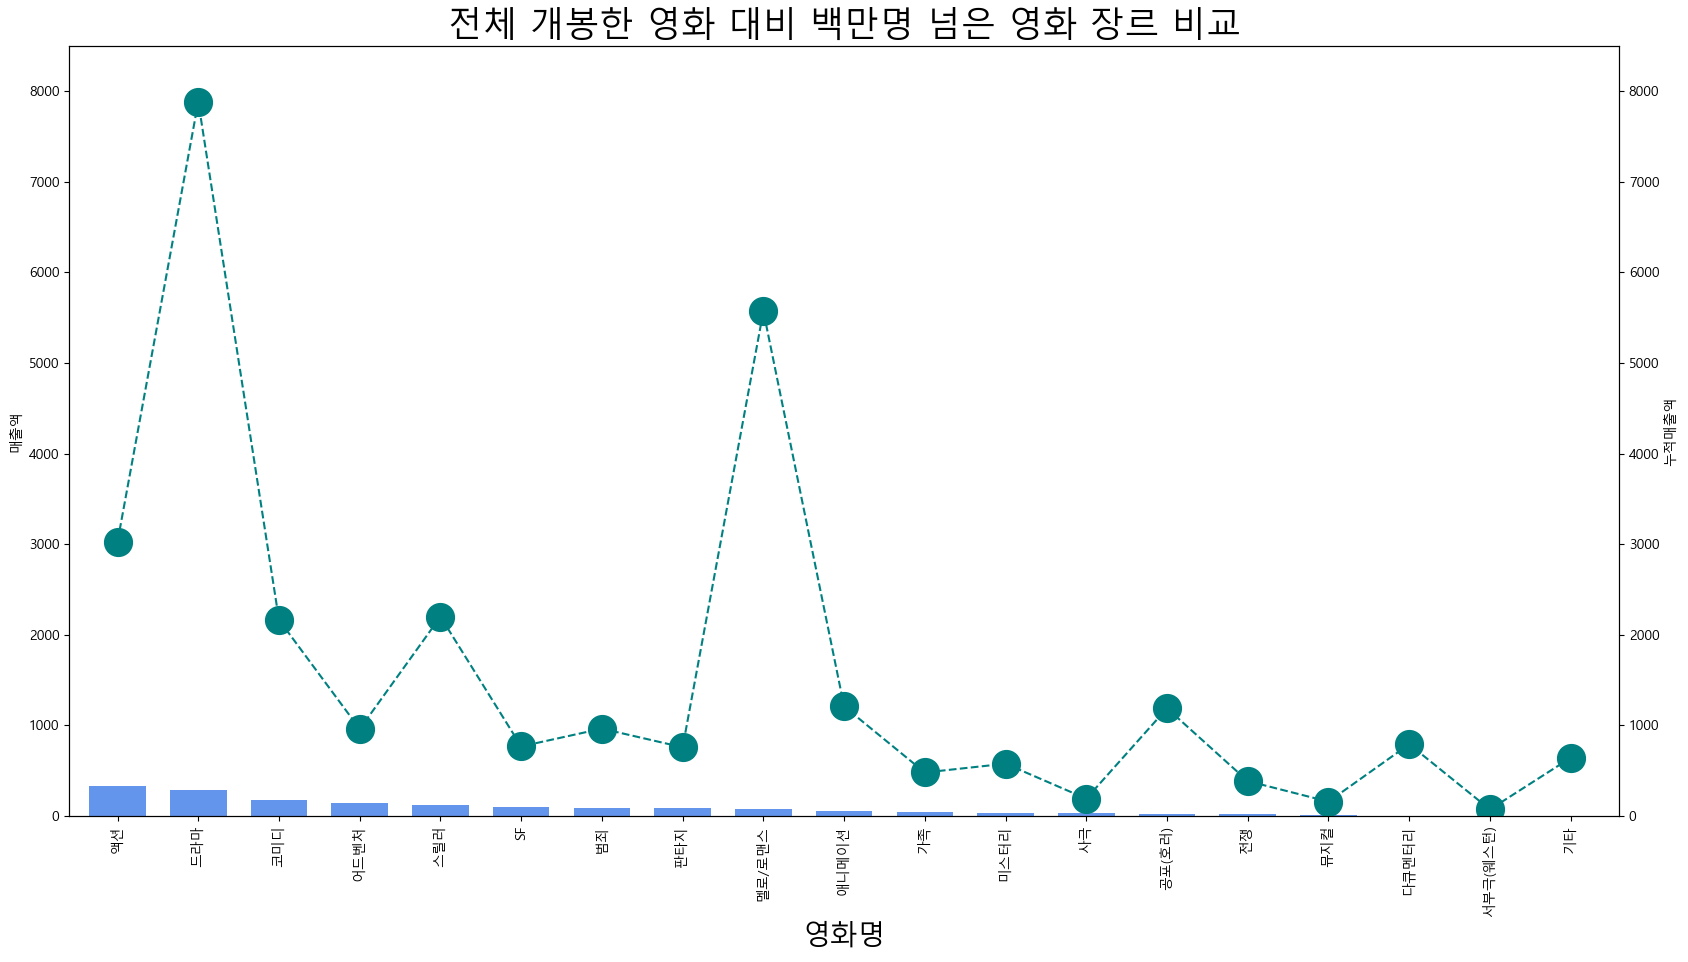

In [58]:
상위 = top_genre_df.sort_values(['상위'],ascending=False).set_index("장르")['상위']
전체 = top_genre_df.sort_values(['상위'],ascending=False).set_index("장르")['전체']

ax1 = 상위.plot(kind='bar', figsize=(20,10), width=0.7, color='cornflowerblue')
ax2 = ax1.twinx() # 여러 개의 그래프를 한 화면에 나타내기
ax2.plot(전체.index, 전체.values, ls='--', marker='o', markersize=20,
         color='teal', label='누적매출액') 

ax1.set_ylim(0, 8500)
ax2.set_ylim(0, 8500)

ax1.set_xlabel('영화명', size=20)
ax1.set_ylabel('매출액')
ax2.set_ylabel('누적매출액')
plt.title('전체 개봉한 영화 대비 백만명 넘은 영화 장르 비교', size=25)
plt.show()

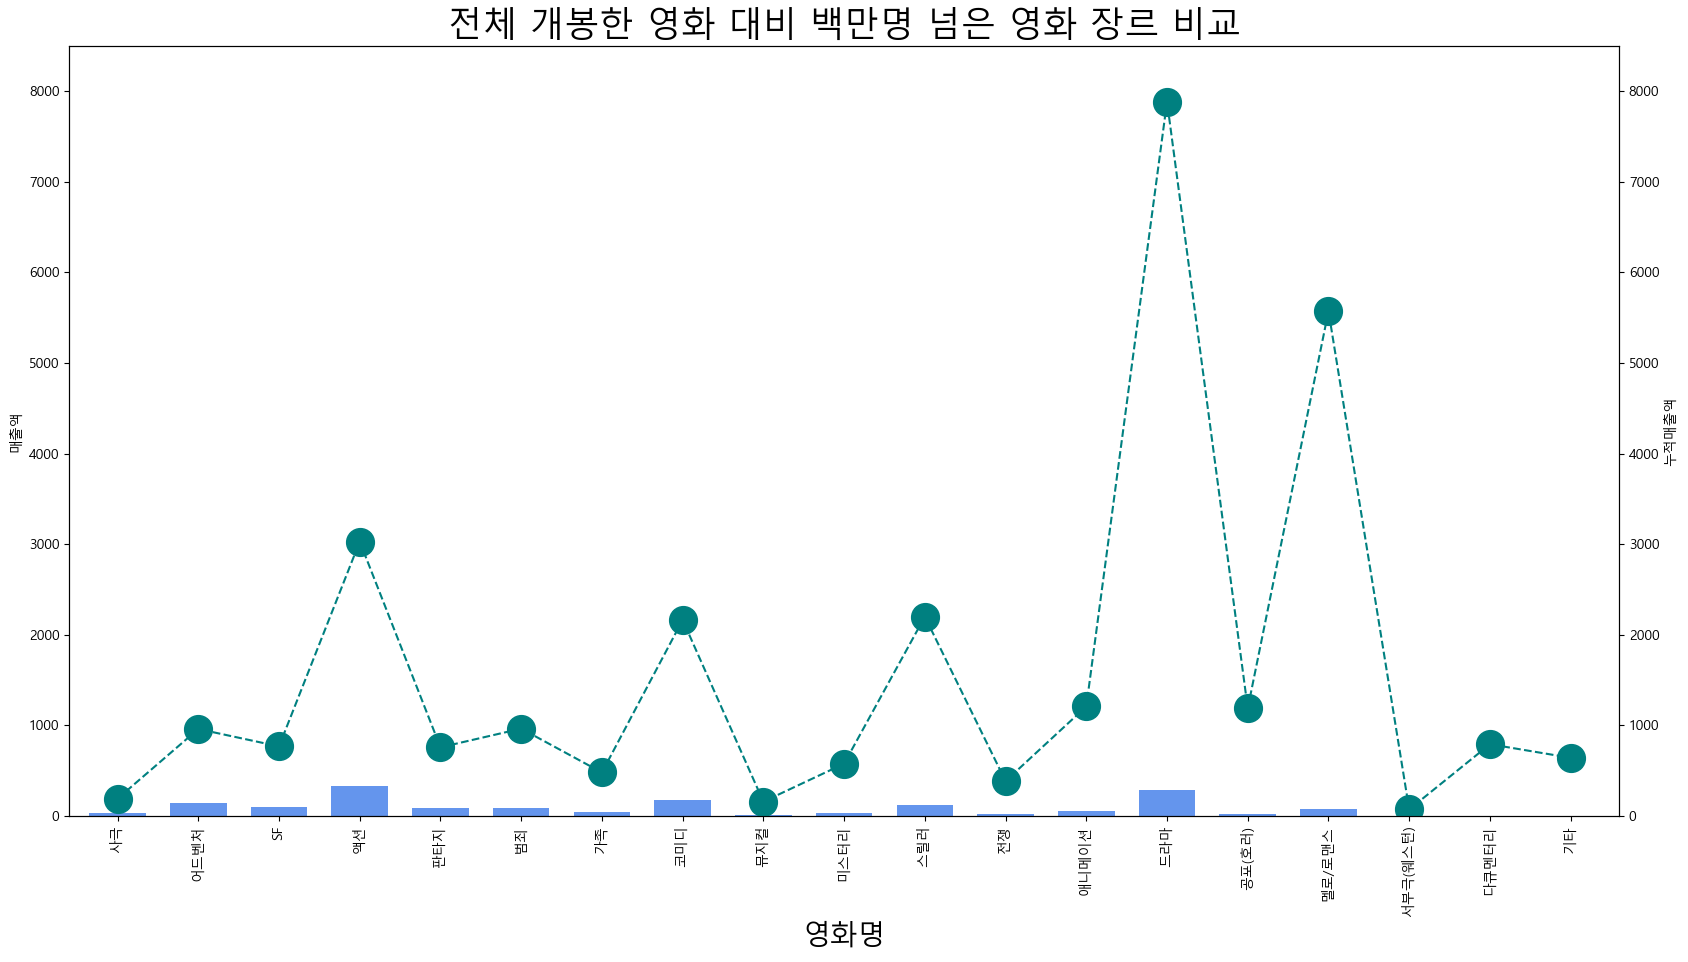

In [57]:
상위 = top_genre_df.sort_values(['비율'],ascending=False).set_index("장르")['상위']
전체 = top_genre_df.sort_values(['비율'],ascending=False).set_index("장르")['전체']

ax1 = 상위.plot(kind='bar', figsize=(20,10), width=0.7, color='cornflowerblue')
ax2 = ax1.twinx() # 여러 개의 그래프를 한 화면에 나타내기
ax2.plot(전체.index, 전체.values, ls='--', marker='o', markersize=20,
         color='teal', label='누적매출액') 

ax1.set_ylim(0, 8500)
ax2.set_ylim(0, 8500)

ax1.set_xlabel('영화명', size=20)
ax1.set_ylabel('매출액')
ax2.set_ylabel('누적매출액')
plt.title('전체 개봉한 영화 대비 백만명 넘은 영화 장르 비교', size=25)
plt.show()

# 연도별 개봉한 영화수

In [59]:
open_count = movie_df[['영화명','개봉일','개봉연도','개봉월']].copy()
open_count.drop_duplicates(inplace=True)

print(len(open_count))

18149


In [60]:
open_count_df1 = open_count.groupby(['개봉연도'])['영화명'].count()
open_count_df1

개봉연도
1936       1
1941       1
1946       1
1950       1
1954       1
        ... 
2019    1560
2020    1474
2021    1576
2022     646
2023      40
Name: 영화명, Length: 72, dtype: int64

In [61]:
open_count_df2 = open_count.groupby(['개봉월'])['영화명'].count()
open_count_df2

개봉월
1     1373
2     1298
3     1498
4     1518
5     1441
6     1417
7     1516
8     1520
9     1583
10    1549
11    1748
12    1688
Name: 영화명, dtype: int64

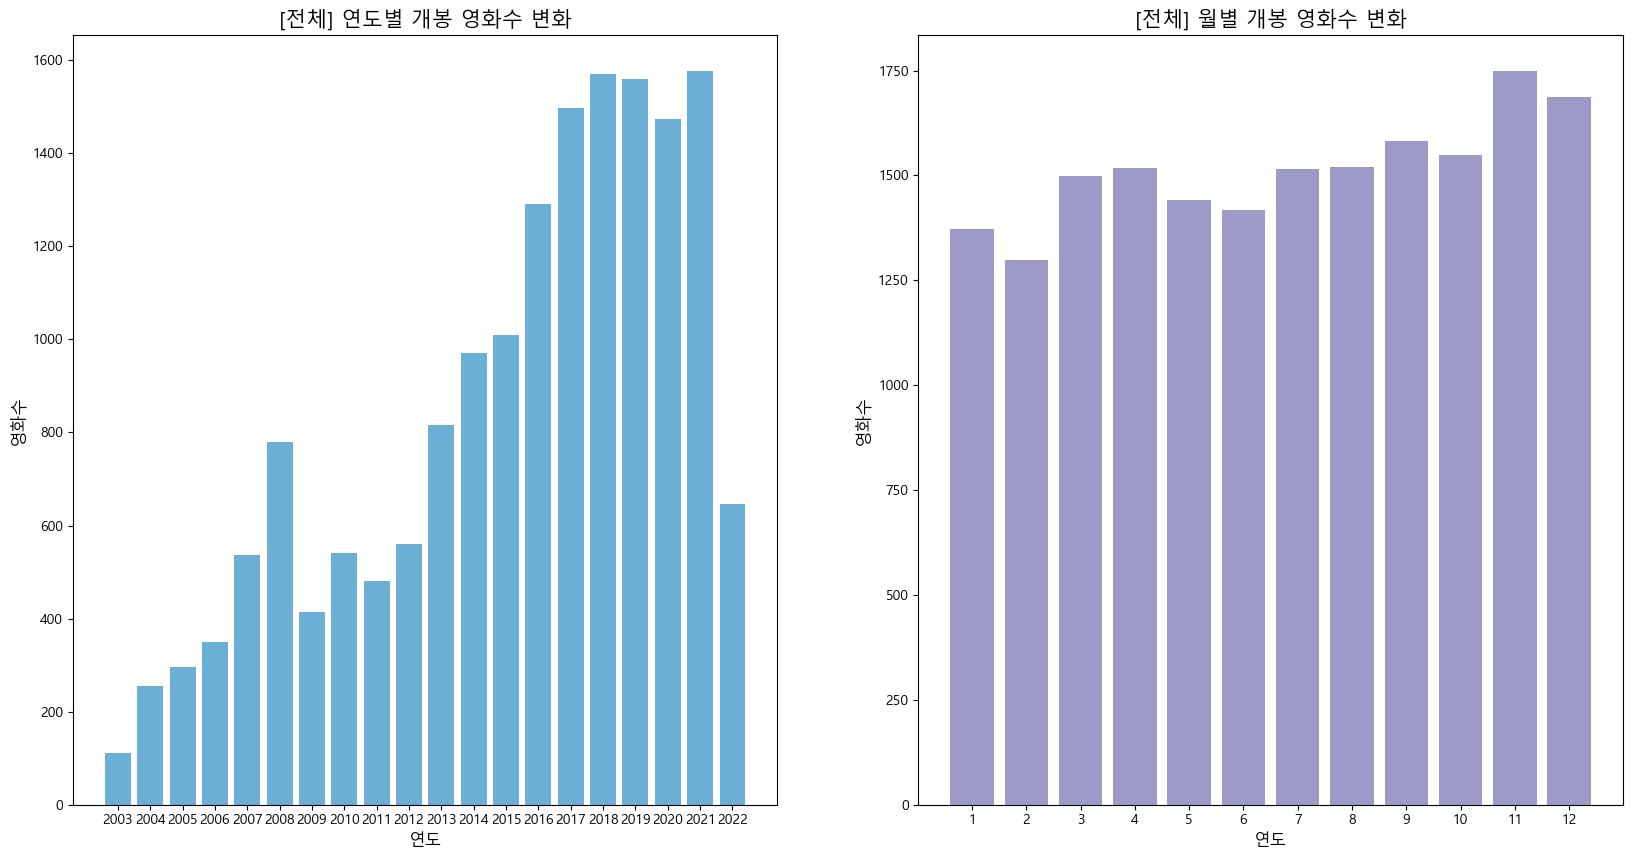

In [81]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,2,1)
ax1.bar(open_count_df1.loc[2003:2022].index.astype('str'), open_count_df1.loc[2003:2022].values, color=colors[0])

ax1.set_title('[전체] 연도별 개봉 영화수 변화', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('영화수',size=12)

ax2 = fig.add_subplot(1,2,2)
ax2.bar(open_count_df2.index.astype('str'), open_count_df2.values, color=colors[12])

ax2.set_title('[전체] 월별 개봉 영화수 변화', size=15)
ax2.set_xlabel('연도',size=12)
ax2.set_ylabel('영화수',size=12)

plt.show()

## 역대

In [83]:
top_open_count = top_movie[['영화명','개봉일','개봉연도','개봉월']].copy()
top_open_count.drop_duplicates(inplace=True)

print(len(top_open_count))

776


In [84]:
top_open_count_df1 = top_open_count.groupby(['개봉연도'])['영화명'].count()
top_open_count_df1

개봉연도
2003     1
2004    26
2005    37
2006    35
2007    42
2008    45
2009    40
2010    43
2011    43
2012    52
2013    53
2014    48
2015    47
2016    52
2017    55
2018    53
2019    50
2020    15
2021    17
2022    22
Name: 영화명, dtype: int64

In [85]:
top_open_count_df2 = top_open_count.groupby(['개봉월'])['영화명'].count()
top_open_count_df2

개봉월
1     69
2     55
3     40
4     51
5     68
6     66
7     85
8     72
9     67
10    59
11    51
12    93
Name: 영화명, dtype: int64

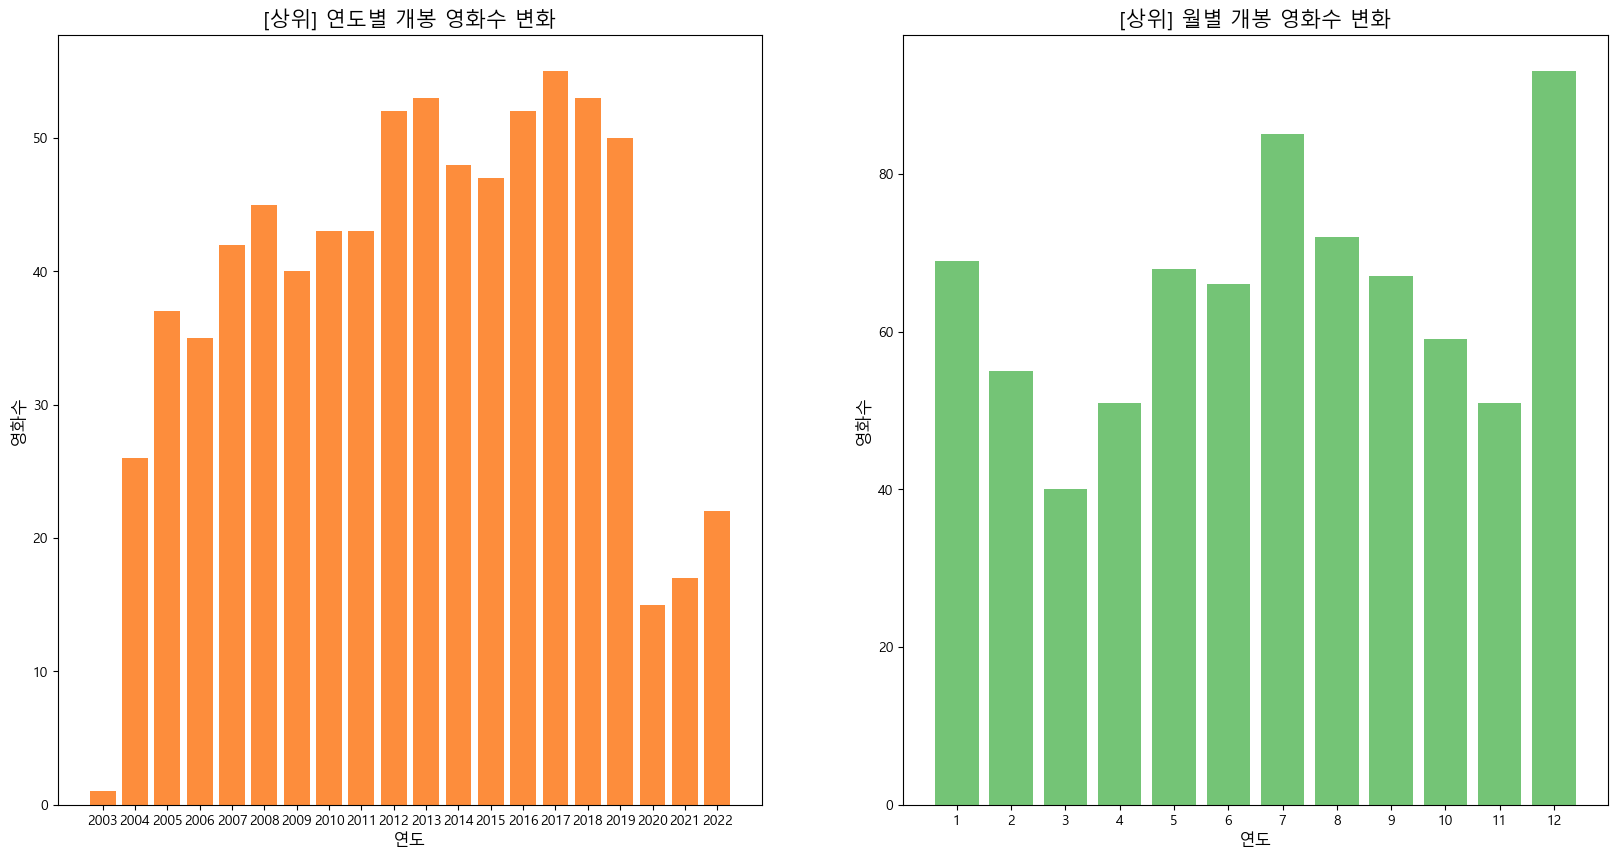

In [88]:
fig = plt.figure(figsize=(20,10))

# year_list = [str(year) for year in range(2004,2023)]
# month_list = [str(month) for month in range(1,13)]

ax1 = fig.add_subplot(1,2,1)
ax1.bar(top_open_count_df1.index.astype('str'), top_open_count_df1.values, color=colors[4])

ax1.set_title('[상위] 연도별 개봉 영화수 변화', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('영화수',size=12)

ax2 = fig.add_subplot(1,2,2)
ax2.bar(top_open_count_df2.index.astype('str'), top_open_count_df2.values, color=colors[8])

ax2.set_title('[상위] 월별 개봉 영화수 변화', size=15)
ax2.set_xlabel('연도',size=12)
ax2.set_ylabel('영화수',size=12)

plt.show()

# 영화관람료

In [87]:
movie_ticket = movie_df.groupby(['기준연도']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
movie_ticket['영화관람료'] = movie_ticket['매출액']/movie_ticket['관객수']
movie_ticket

,매출액,관객수,스크린수,상영횟수,영화관람료
기준연도,,,,,
2003,8929674500,1387201,2482,13792,6437.188627
2004,439910258906,69114163,211682,1153629,6364.979909
2005,778210156467,123004102,477303,2478397,6326.700848
2006,891315288300,144063421,599392,2943349,6186.964617
2007,961366753038,151279529,810025,3836733,6354.903135
2008,961029569651,147355367,925985,4153853,6521.849792
2009,1082129159250,155235763,996027,4271023,6970.875386
2010,1156027134350,147580941,1020766,4358578,7833.173623
2011,1233119476000,159399837,1116519,4232988,7736.014661


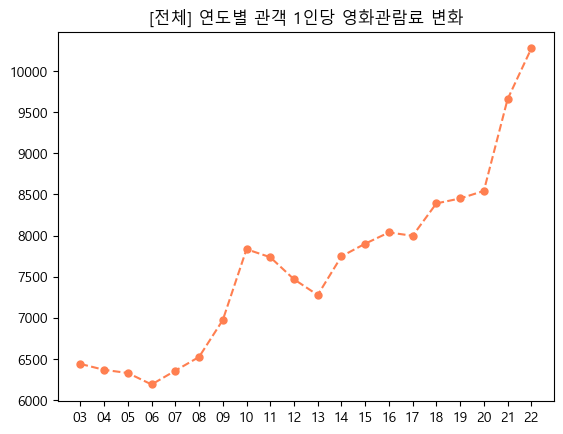

In [88]:
figsize=(20,5)
year_list = [str(i)[2:] for i in movie_ticket.index]
plt.plot(year_list, movie_ticket['영화관람료'].values, ls='--', marker='o', markersize=5, color='coral')
plt.title(f"[전체] 연도별 관객 1인당 영화관람료 변화")
plt.show()